# Text Vectorisation and Similarity

The process of converting or transforming a data set into a set of vectors is called __Vectorization__.<br>
Here we explore several methods of text vectorisation.
- __word vectors__ - a relatively old approach of NLP, where the words of a sentence are processed without context, just lexically (NLP). These algorithms implement techniques, such as __Bag-Of-Words__ and __TF-IDF__ <br>
- modern algoriths that consider the meaning, the semantical role of the word in a sentence and simulate "undrstanding" the inforation in the document (NLU). These algiriths implement tokens, embedding, and deep learning ANN.

This notebook explains the __first approach__ and several methods for its implementation.

Objectives: 
- understanding the basic concepts of text vectorisation 
- practicing implementation of vectorisation algorithms in Python programming

Tasks: 
1. Create a function for estimating the similarity between two vectors by means of _cosine similarity_ measure
2. Test the function by comparing variety of numeric test data
3. Test the function by comparing text data
3. Apply the function in a Q&A (questions answering) application

In [ ]:
import numpy as np
import pandas as pd
import ctypes
import math
import pprint

In [ ]:
import cosimfunc
from cosimfunc import cosim

In [ ]:
import importlib 
importlib.reload(cosimfunc)

## Input 

First, we experiment with two text documents (sentences).

In [ ]:
# enter two sentences
doc1 = "Mette Frederiksen is the prime minister of Denmark."
doc2 = "Denmark has female prime minister, who has the name Mette Frederiksen."

## Cosine Similarity
We need to convert the sentences into numeric vectors (arrays of numbers). Then we can compare the vectors for discovering how similar the original sentences are.

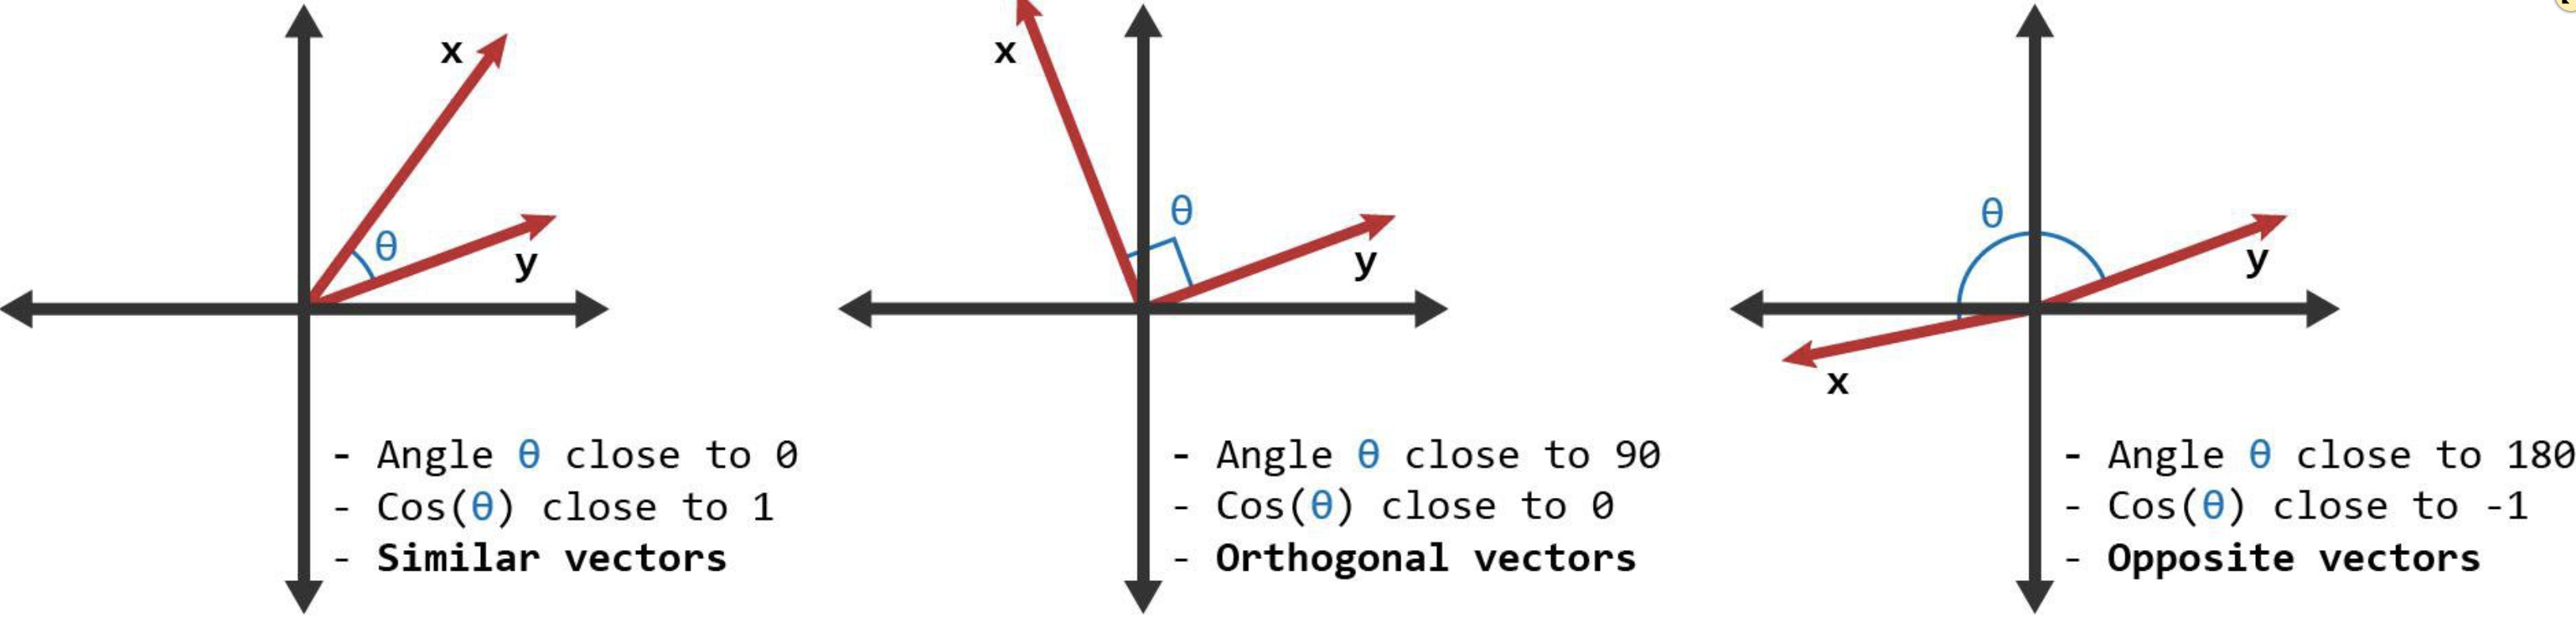

## Bag Of Words

A model, which represents the text as an unordered collection of words. It doesn't considedr the grammar features, nor the order of appearance of the words, but keeps information about multiplicity of the words. <br>
Once we collect the words, we can code them in a numeric code, so to be able to apply the similarity function.

In [ ]:
# parse the sentences in words
sent1 = doc1.split(" ")
sent2 = doc2.split(" ")

In [ ]:
print(sent1)
print(sent2)

### Corpus of Terms

In [ ]:
# All words appearing in all documents
# union() removes duplications
corpus = set(sent1).union(set(sent2))
print(corpus)

In [ ]:
# corpus size
n = len(corpus)
n

### Method 1: Binary Vectorisation

Check if a word appears in a semntence (document).
- For each word write 1 if it appears or 0 if not.
- Do this for each sentence separately.

Store the findings in a dictionary (key - value structure), one dict for each sentence.
- fron the start each dictionary will contain empty positions - one per word in the corpus
- the word is a key, the appearance of it is a value - 1 (appear) or 0 (doesn't appear)

In [ ]:
# Binary vector of word appearance in a sentence
def vect(sent):
    # create new dict and place zeros in it
    mydict = dict.fromkeys(corpus, 0) 
    
    # code each word's appearance in the sentence with 1
    for word in sent:
        mydict[word] = 1
    return mydict    

In [ ]:
# binarise sentence 1
dict1 = vect(sent1)
dict1

In [ ]:
dict2 = vect(sent2)
dict2

In [ ]:
# Store the data into DataFrame
df = pd.DataFrame([dict1, dict2])
df

In [ ]:
ar = df.to_numpy() 

In [ ]:
# Test the similarity
cosim(ar[0], ar[1])

__NB__: Notice the role of the fullstop at the end of the sentences!

## Method 2: Word Importance
We define some more features of the text, which could matter for the role of the words in it.

- __TF__ - term frequency -  how frequest is the appearance of a term (word) in a document
- __DF__ - document frequency - number of documents containing the term
- __IDF__ - inverse term frequency - how big part of all documents contain the term
- __TF-IDF__ - an integrated measure for the importance of a term - multiply __TF x IDF__ to find it.

term = word

TF can be measured in different ways:
- absolute number of times the word appears in a document
- relative frequency - count of occurences divided by number of words in the document
- logarithmically scaled frequency (e.g. log(1 + count))

### 2.1 Count Vectorisation

Consider the _number of occurencies_ of a word in a document (how many times the same word appears) - raw count. 

In [ ]:
# Create count vector from a sentence, telling the frequency of word appearance
def cvect(sent):
    
    # creates the dict with the corpus as keys
    mydict = dict.fromkeys(corpus, 0) 
    
    # count the occurance of each word
    for word in sent:
        mydict[word] += 1
    return mydict    

In [ ]:
dict1 = cvect(sent1)
dict2 = cvect(sent2)

In [ ]:
# collect the dictionaires in a data frame
dfc = pd.DataFrame([dict1, dict2])
dfc

Re-calculate the similarity

In [ ]:
# Store the binary values into array
arc = dfc.to_numpy()
arc

In [ ]:
# Test the similarity
cosim(arc[0], arc[1])

### 2.2  Term Frequency
Relative TF

tf(t,d) = count of t in d / number of words in d

In [ ]:
# Recalculate the word appearance as a proportion of all words in the document
def computeTF(mydict, n):
    # New empty dict for the results of recalculation
    tfDict = {}
    
    for word, wcount in mydict.items():
        # calculate the proportion
        tfDict[word] = wcount/float(n) 
    return(tfDict)

In [ ]:
# call the function for both sets
tf1 = computeTF(dict1, len(sent1))
tf2 = computeTF(dict2, len(sent2))

In [ ]:
# store the two vectors into dataframe
tff = pd.DataFrame([tf1, tf2])
tff

TF doen't mean much. 10 times higher frequency doesn't mean 10 times more important term.

In [ ]:
# compute similarity

In [ ]:
# Store the binary values into array
art = tff.to_numpy()

In [ ]:
# Test the similarity
cosim(art[0], art[1])

### 2.3 DF and IDF

If a word occurs many times in one document, but also in other documents, it may not be important, but just frequent .
IDF determines how common a word is amongst the whole corpus.

In [ ]:
# IDF - inverse document frequency - measures the informativeness of term t
# DF - number of documents containing the term
# N - number of all documents
# D - corpus of all words

# idf(t, D) = N/df

def computeIDF(allDocs):
    # number of documents
    N = len(allDocs) 

    # create empty dict, put the words in as keys and 0 as value
    idf = {}
    idf = dict.fromkeys(allDocs[0].keys(), 0)    
    
    # check all docs 
    for doc in allDocs:
        # check all words 
        for word, wcount in doc.items():
            # count the doc if the word appears in it
            if wcount > 0:
                idf[word] += 1
    
    # make correction in the counting to avoid eventual division by zero: idf(t) = log10(N/(df + 1))
    for word, wcount in idf.items():
        idf[word] = math.log10(N/(float(wcount)) + 1)
        
    return(idf)

In [ ]:
# test
idfs = computeIDF([dict1, dict2])

In [ ]:
pprint.pprint(idfs)

### 2.4 TF-IDF
TF-IDF determines how relevant a term is in a given document

In [ ]:
# tf-idf(t, d) = tf(t, d) * idf(t, D)

def computeTFIDF(tf, idfs):
    tfidf = {}
    for word, wcount in tf.items():
        tfidf[word] = wcount*idfs[word]
    return(tfidf)


In [ ]:
#running our two sentences through the IDF:
idf1 = computeTFIDF(tf1, idfs)
idf2 = computeTFIDF(tf2, idfs)


In [ ]:
# store in a dataframe
idf= pd.DataFrame([idf1, idf2])
idf

In [ ]:
# Store the binary values into array
arx = idf.to_numpy()

In [ ]:
# Test the similarity
cosim(arx[0], arx[1])

BOW has many negatives
- for example, it counts equaly "John is older than Mary" and "Mary is older than John".

## Method 3: Impoving by Preprocessing

In [ ]:
!pip install langdetect

In [ ]:
import langdetect
from langdetect import detect, detect_langs

In [ ]:
import spacy
from spacy import displacy

In [ ]:
!python -m spacy validate

In [ ]:
!python -m spacy download en_core_web_md

In [ ]:
!python -m spacy download da_core_news_md

In [ ]:
import string
import pprint

In [ ]:
def clean(text):
    text = text.lower()
    
    # string.punctuation removes !"#$%&\'()*+,-./:;?@[\\]^_{|}~`
    PUNCT = string.punctuation
    text = text.translate(str.maketrans('', '', PUNCT))
    return text

In [ ]:
def tokenize(text):
    lang = detect(text)
    if lang == 'en': 
        model = 'en_core_web_md'
        from spacy.lang.en.stop_words import STOP_WORDS
    elif lang == 'da': 
        model = 'da_core_news_md'
        from spacy.lang.da.stop_words import STOP_WORDS
    else:
         print("Wrong language")
        
    mysent = []
    nlp = spacy.load(model)
    doc = nlp(text)
    
    for token in doc:
        if not (token.is_stop or token.is_punct or token.is_space):
            data = {'token': token.text,'lemma': token.lemma_, 'POS': token.pos_, 'tag': token.tag_, 
                    "ent_type": token.ent_type_}
            pprint.pprint(data)
            mysent.append(token.text)
    # spacy.displacy.serve(doc, style="ent")
    # spacy.displacy.serve(doc, style="dep")
    return mysent

In [ ]:
sent1 = clean(doc1)
sent1

In [ ]:
tok1 = tokenize(sent1)
tok1

#### Task: Recalculate the similarity of the two sentences.